# Customer Purchase Behavior Analysis
This project aims to explore how customer demographics (like age, gender, income) relate to their spending behavior using Python.

# Importing Libraries & Loading Data

In [1]:
# Importing Libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
# Loading & Reading the data set.
df = pd.read_csv('customer_analysis.csv')
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,PurchaseCategory
0,101,Male,23,40000,60,Clothing
1,102,Female,31,50000,70,Electronics
2,103,Female,35,62000,90,Groceries
3,104,Male,22,35000,50,Clothing
4,105,Female,45,80000,80,Electronics


# Initial Data Exploration

In [3]:
# It print the Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        10 non-null     int64 
 1   Gender            10 non-null     object
 2   Age               10 non-null     int64 
 3   AnnualIncome      10 non-null     int64 
 4   SpendingScore     10 non-null     int64 
 5   PurchaseCategory  10 non-null     object
dtypes: int64(4), object(2)
memory usage: 612.0+ bytes


In [4]:
# Checking Null Value
df.isnull().sum()

CustomerID          0
Gender              0
Age                 0
AnnualIncome        0
SpendingScore       0
PurchaseCategory    0
dtype: int64

# Visualize_Gender Distribution

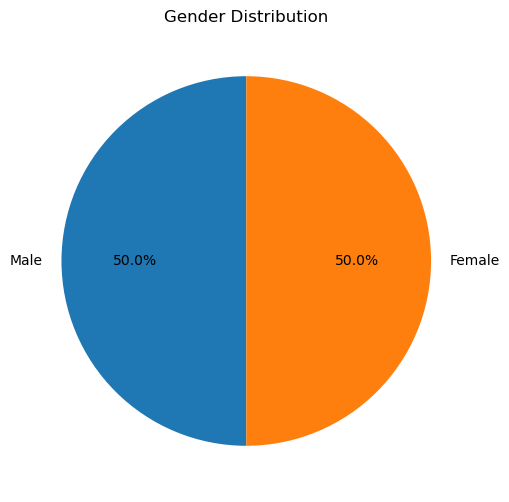

In [5]:
Gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(Gender_counts, labels = Gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Analyze Spending Score by Gender

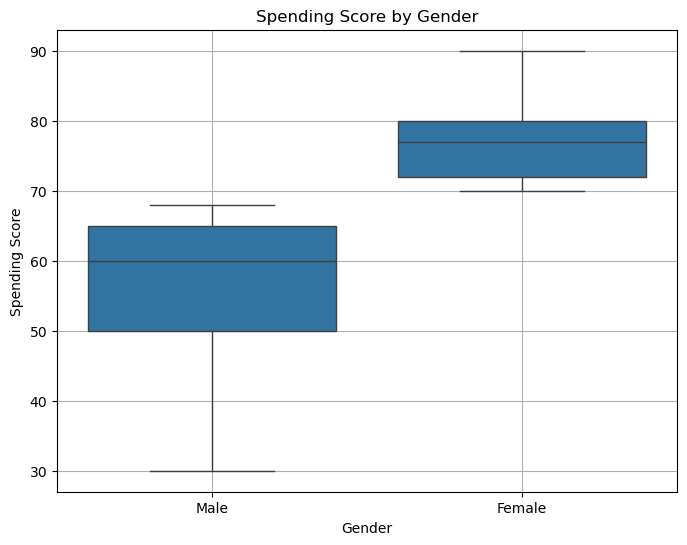

Average Spending Score by Gender:
 Gender
Female    77.8
Male      54.6
Name: SpendingScore, dtype: float64


In [6]:
# Using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x='Gender', y='SpendingScore')
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

# Average spending score by gender
avg_spending_by_gender = df.groupby('Gender')['SpendingScore'].mean()
print("Average Spending Score by Gender:\n", avg_spending_by_gender)

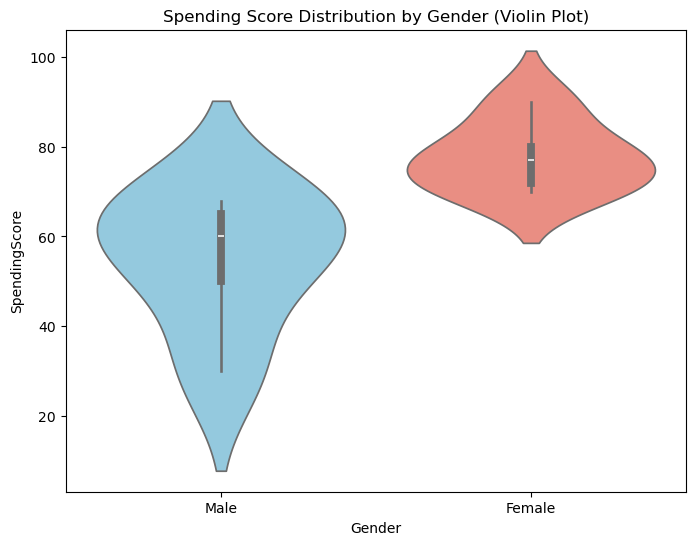

In [7]:
# Another way to show the analyze_spending_score_by_gender

plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='SpendingScore', data=df, palette=['skyblue', 'salmon'])
plt.title('Spending Score Distribution by Gender (Violin Plot)')
plt.xticks([0, 1], ['Male', 'Female'])  # Set x-axis labels
plt.show()

# Explore Relationship Between Age and Spending Score

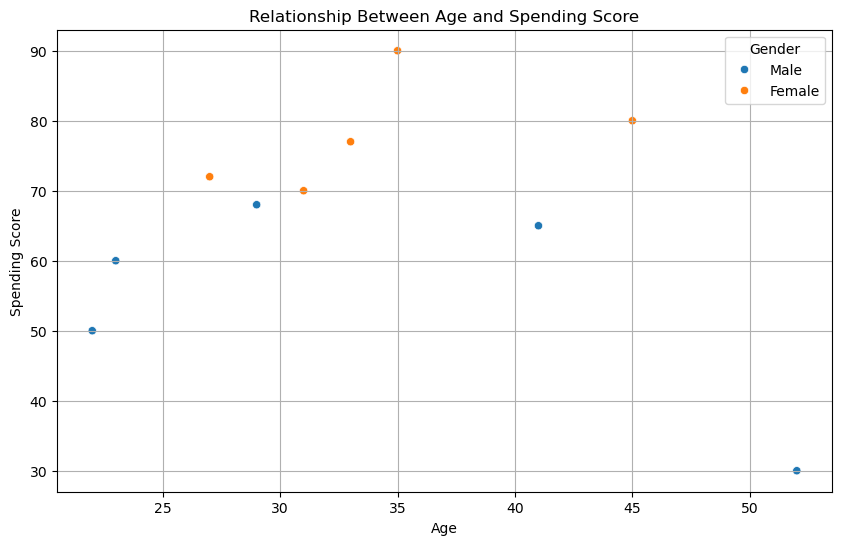

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue='Gender')
plt.title('Relationship Between Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

# Category-Wise Spending Analysis

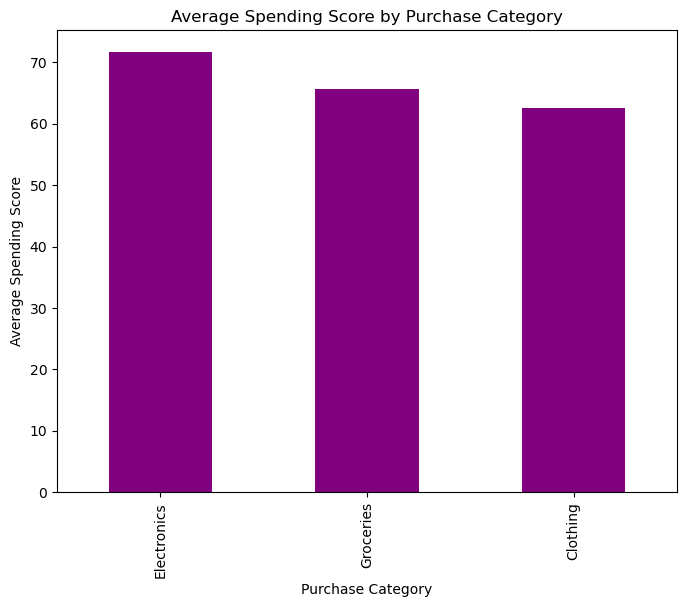

Average Spending Score by Category:
 PurchaseCategory
Electronics    71.666667
Groceries      65.666667
Clothing       62.500000
Name: SpendingScore, dtype: float64


In [9]:
category_avg_spending = df.groupby('PurchaseCategory')['SpendingScore'].mean().sort_values(ascending=False)

# Plot the average spending score by category
plt.figure(figsize=(8, 6))
category_avg_spending.plot(kind='bar', color='purple')
plt.title('Average Spending Score by Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Average Spending Score')
plt.show()

print("Average Spending Score by Category:\n", category_avg_spending)

# (Optional) Add More Analysis

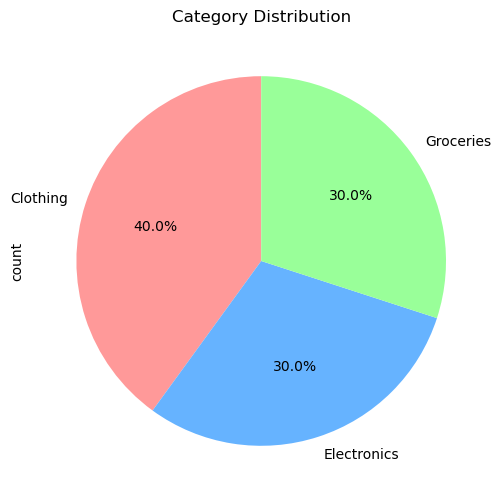

In [10]:
# Create Pie Chart for Category Distribution

category_distribution = df['PurchaseCategory'].value_counts()

plt.figure(figsize=(6, 6))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Category Distribution')
plt.show()

# Conclusion